In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
sns.set(style='darkgrid')

In [2]:
import os
directory_path = 'F:\Car price prediction'
files_in_directory = os.listdir(directory_path)
print(files_in_directory)

['car data.csv']


In [3]:
directory_path = 'F:\Car price prediction'
files_in_directory = os.listdir(directory_path)
csv_file = [file for file in files_in_directory if file.endswith('.csv')][0]
file_path = os.path.join(directory_path, csv_file)
df = pd.read_csv(file_path)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df_shape = df.shape
print(df_shape)

(301, 9)


In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df_cleaned = df.dropna()

In [10]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled = df.copy()
df_filled[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled = df.copy()
df_filled[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print('Unique Values of Fuel Type', df['Fuel_Type'].unique())
print('Unique Values of Transmission', df['Transmission'].unique())
print('Unique Values of Selling Type', df['Selling_type'].unique())
print('Unique Values of Owner', df['Owner'].unique())
print('Unique Values of Year', df['Year'].unique())

Unique Values of Fuel Type ['Petrol' 'Diesel' 'CNG']
Unique Values of Transmission ['Manual' 'Automatic']
Unique Values of Selling Type ['Dealer' 'Individual']
Unique Values of Owner [0 1 3]
Unique Values of Year [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


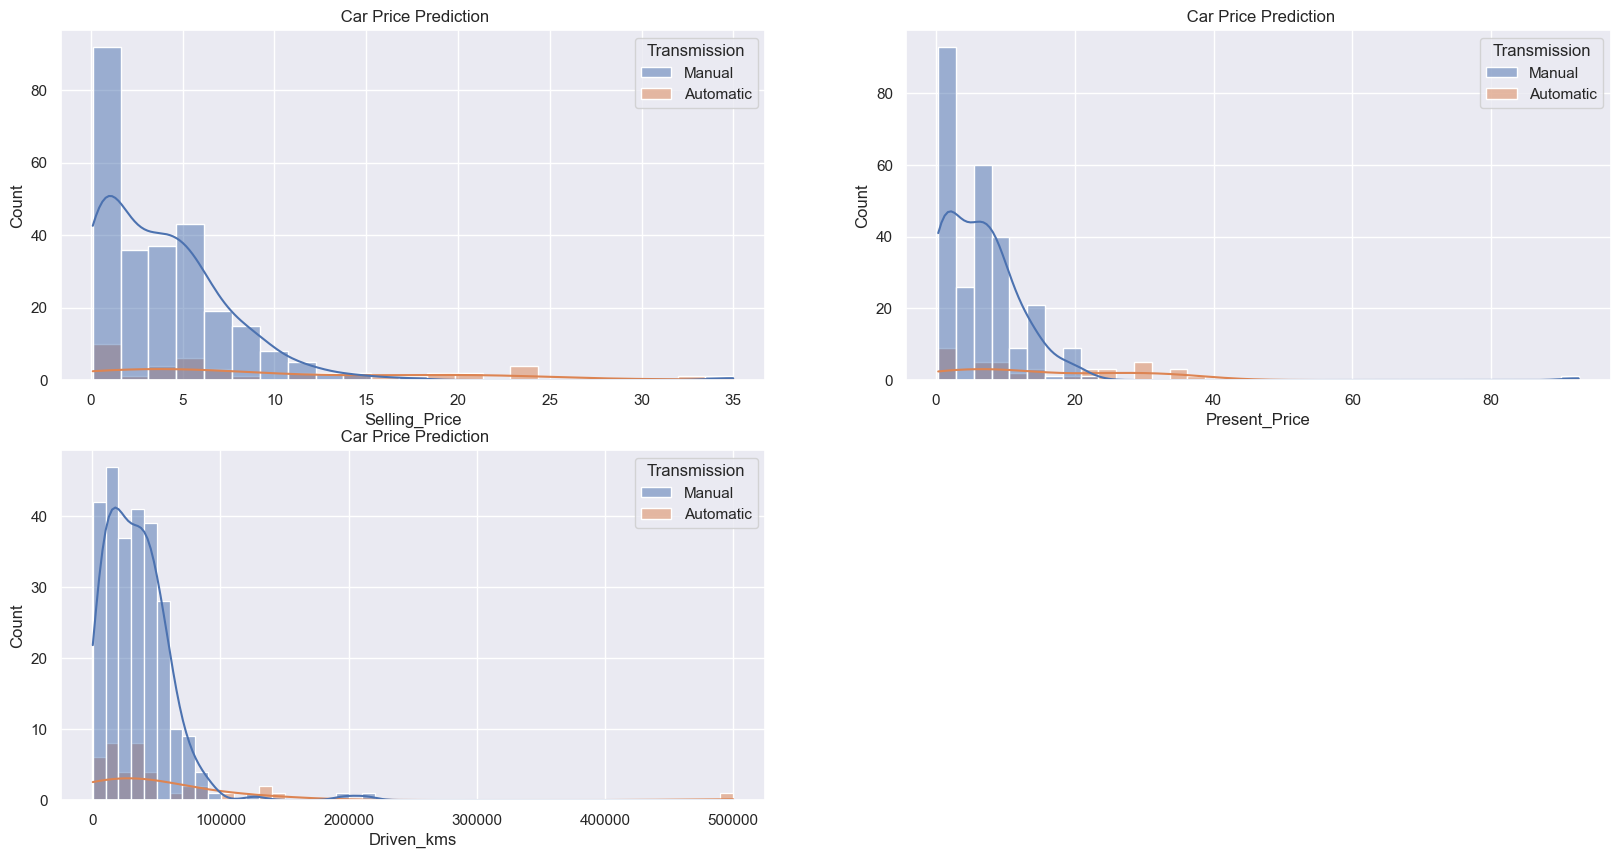

In [12]:
import plotly.express as px
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled = df.copy()
df_filled[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

plt.figure(figsize=(20, 10))
for i, col in enumerate(['Selling_Price', 'Present_Price', 'Driven_kms']):
    plt.subplot(2, 2, i + 1)
    plt.title(' Car Price Prediction')
    
    
    sns.histplot(data=df, x=col, kde=True, hue='Transmission')

plt.show()


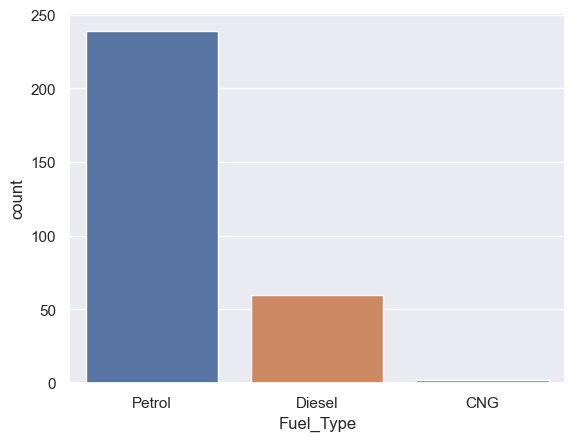

In [13]:
sns.countplot(x='Fuel_Type', data=df)
plt.show()

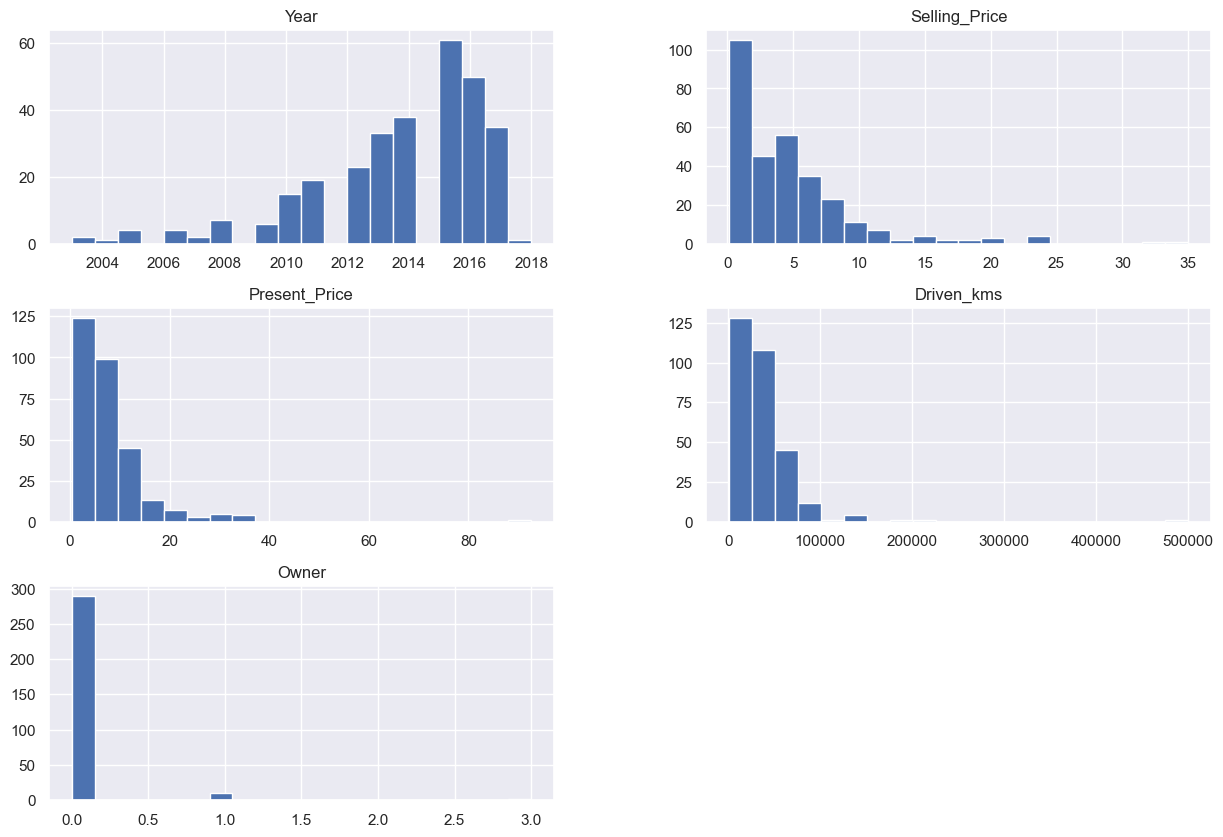

In [14]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

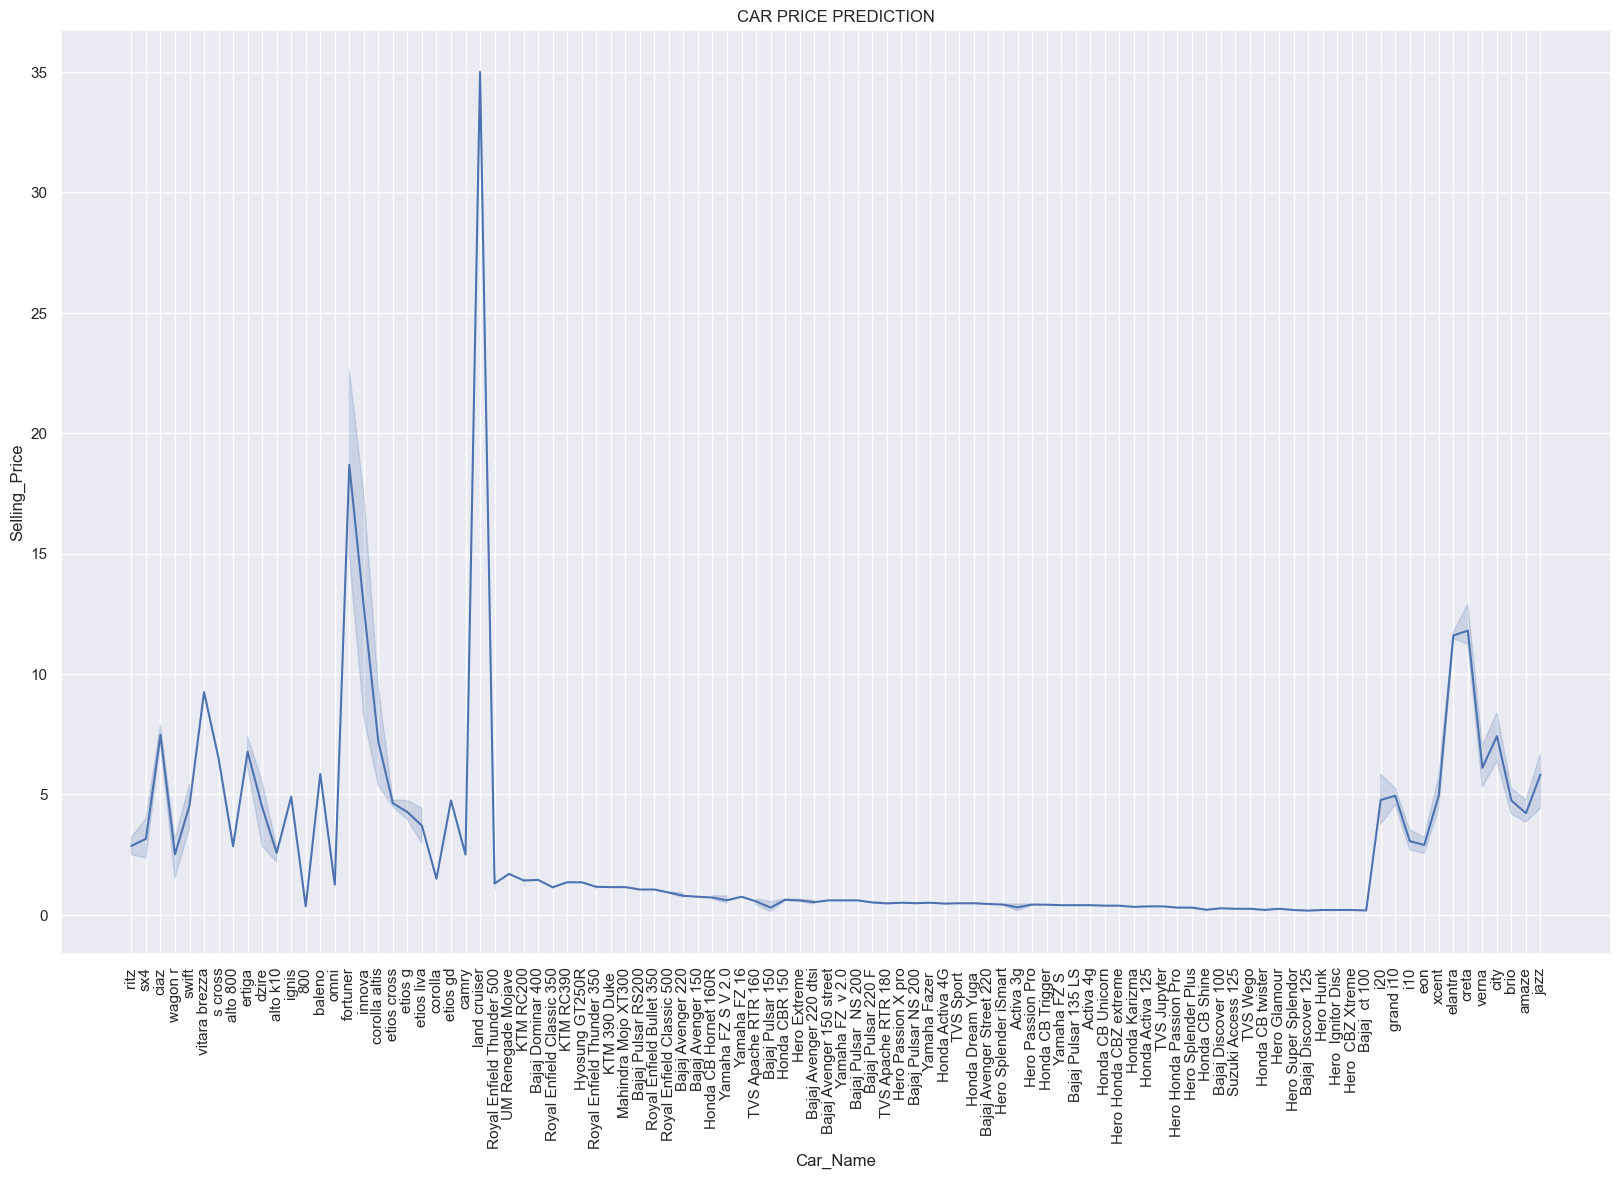

In [15]:
plt.figure(figsize=(20,12))
sns.lineplot(x='Car_Name', y='Selling_Price', data=df)
plt.title('CAR PRICE PREDICTION')
plt.xticks(rotation=90)  
plt.show()

In [22]:
features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Transmission', 'Owner']

X = pd.get_dummies(df[features], drop_first=True) 
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)
print('\nFeature Importance:')
print(sorted_feature_importance)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

Mean Squared Error: 0.7967100916393435
R-squared: 0.9654139407255942

Feature Importance:
Present_Price          0.882436
Year                   0.061919
Driven_kms             0.038045
Transmission_Manual    0.010280
Fuel_Type_Diesel       0.003476
Fuel_Type_Petrol       0.003323
Owner                  0.000521
dtype: float64


LinearRegression()

In [18]:
y_pred_linear = linear_model.predict(X_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

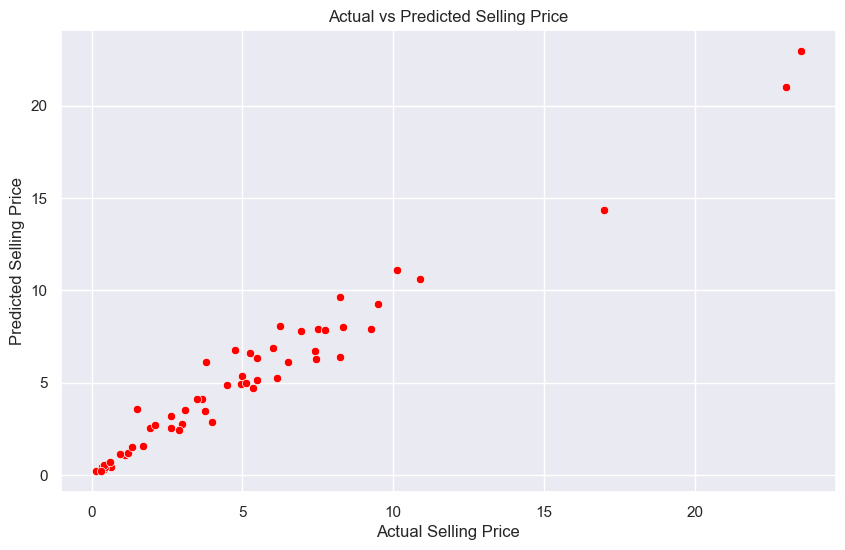

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()
